<a href="https://colab.research.google.com/github/Jwangombe11/Tomatoes-Disease-Detection/blob/main/Tomato_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1:- Import the required libraries 
!pip install keras
from keras import layers
from keras import models
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Step 2:- Loading the data 
labels = ['tomatoes_Bacterial_spot', 'tomatoes_healthy']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [5]:
#Now we can easily fetch our train and validation data.
train = get_data('/content/gdrive/MyDrive/Tomatoes/Tomatoes_disease_classification-main/Tomatoes/train')
#val = get_data('Tomatoes/valid')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


In [6]:
val = get_data('/content/gdrive/MyDrive/Tomatoes/Tomatoes_disease_classification-main/Tomatoes/valid')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


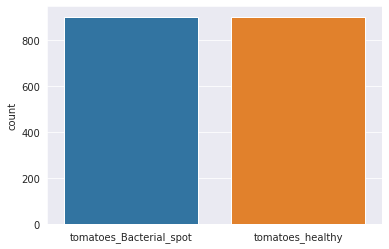

In [9]:
# Step 3:- Visualize the data 
import seaborn as sns
l = []
for i in train:
    if(i[1] == 0):
        l.append("tomatoes_Bacterial_spot")
    else:
        l.append("tomatoes_healthy")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'tomatoes_Bacterial_spot')

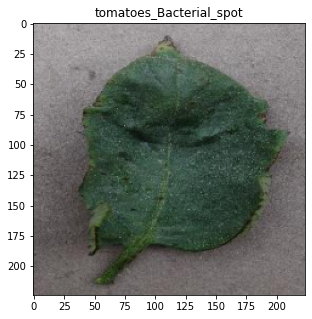

In [18]:
# Visualize a random image for tomatoes bacterial spot
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'tomatoes_healthy')

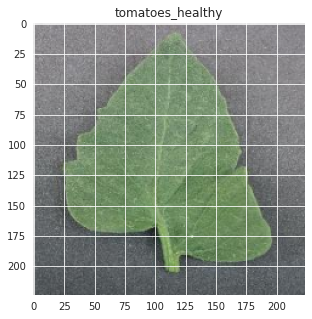

In [11]:
# Visualize a random image for healthy tomato leaf
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [11]:
# Step 4:- Data Preprocessing and Data Augmentation
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [13]:
# Data augmentation on the train data
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [14]:
# Step 5:- Define the Model 
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [15]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [17]:
history = model.fit(x_train,y_train,epochs = 20 , validation_data = (x_val, y_val))

Epoch 1/20
57/57 [==============================] - 105s 2s/step - loss: 0.6573 - accuracy: 0.6106 - val_loss: 0.6400 - val_accuracy: 0.5150
Epoch 2/20
57/57 [==============================] - 107s 2s/step - loss: 0.6426 - accuracy: 0.6328 - val_loss: 0.6228 - val_accuracy: 0.7050
Epoch 3/20
57/57 [==============================] - 105s 2s/step - loss: 0.6250 - accuracy: 0.7339 - val_loss: 0.6042 - val_accuracy: 0.7700
Epoch 4/20
57/57 [==============================] - 105s 2s/step - loss: 0.6089 - accuracy: 0.7644 - val_loss: 0.5840 - val_accuracy: 0.8650
Epoch 5/20
57/57 [==============================] - 107s 2s/step - loss: 0.5856 - accuracy: 0.8300 - val_loss: 0.5633 - val_accuracy: 0.8550
Epoch 6/20
57/57 [==============================] - 105s 2s/step - loss: 0.5676 - accuracy: 0.8583 - val_loss: 0.5420 - val_accuracy: 0.8650
Epoch 7/20
57/57 [==============================] - 105s 2s/step - loss: 0.5473 - accuracy: 0.8694 - val_loss: 0.5186 - val_accuracy: 0.9000
Epoch 8/20
57

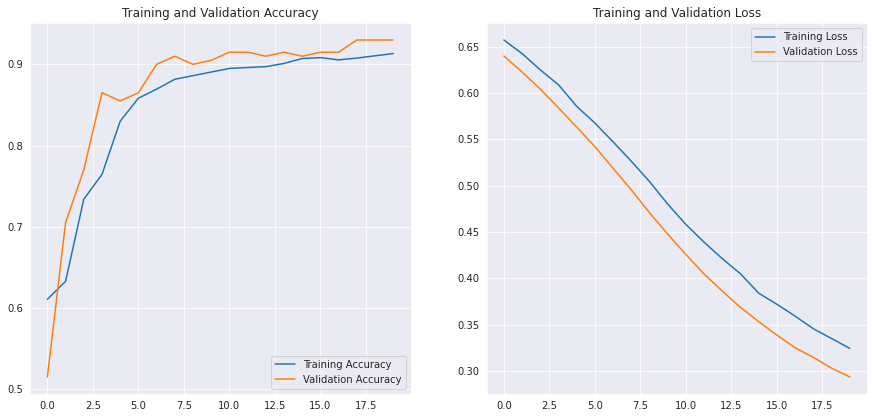

In [18]:
# Step 6:- Evaluating the result
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [38]:
# Print out the classification report to see the precision and accuracy.
predictions = np.argmax(model.predict(x_val),axis=-1)
predictions = predictions.astype(int)
print('Classification Report')
print(classification_report(y_val, predictions, target_names = ['Tomatoes_Bacterial_Spots (Class 0)','Tomatoes_Healthy (Class 1)']))

Classification Report
                                    precision    recall  f1-score   support

Tomatoes_Bacterial_Spots (Class 0)       0.99      0.87      0.93       100
        Tomatoes_Healthy (Class 1)       0.88      0.99      0.93       100

                          accuracy                           0.93       200
                         macro avg       0.94      0.93      0.93       200
                      weighted avg       0.94      0.93      0.93       200



# Transfer Learning using MobileNetV2


In [7]:
# Step 1:- Import the model
base_model = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

9420800/9406464 [==============================] - 0s 0us/step


In [8]:
base_model.trainable = False

In [21]:
model_tf = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(1, activation="sigmoid")                                     
                                ])

In [22]:
base_learning_rate = 0.00001
model_tf.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_tf = model_tf.fit(x_train,y_train,epochs = 20 , validation_data = (x_val, y_val))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


57/57 [==============================] - 56s 920ms/step - loss: 0.6677 - accuracy: 0.5994 - val_loss: 0.6344 - val_accuracy: 0.6700
Epoch 2/20
57/57 [==============================] - 48s 849ms/step - loss: 0.6412 - accuracy: 0.6239 - val_loss: 0.6190 - val_accuracy: 0.6900
Epoch 3/20
57/57 [==============================] - 47s 833ms/step - loss: 0.6307 - accuracy: 0.6433 - val_loss: 0.6040 - val_accuracy: 0.7100
Epoch 4/20
57/57 [==============================] - 51s 895ms/step - loss: 0.6191 - accuracy: 0.6589 - val_loss: 0.5895 - val_accuracy: 0.7150
Epoch 5/20
57/57 [==============================] - 48s 838ms/step - loss: 0.6079 - accuracy: 0.6711 - val_loss: 0.5752 - val_accuracy: 0.7350
Epoch 6/20
57/57 [==============================] - 48s 845ms/step - loss: 0.5840 - accuracy: 0.7039 - val_loss: 0.5617 - val_accuracy: 0.7500
Epoch 7/20
57/57 [==============================] - 48s 836ms/step - loss: 0.5711 - accuracy: 0.7189 - val_loss: 0.5486 - val_accuracy: 0.7700
Epoch 8/20

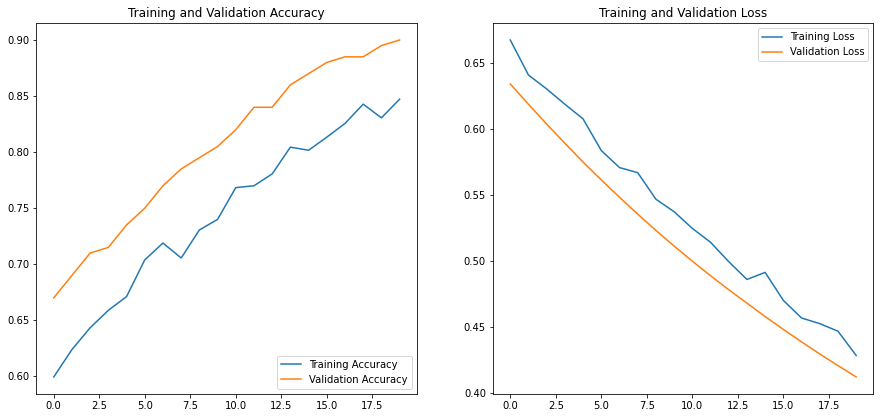

In [23]:
# Step 2:- Evaluating the result
acc = history_tf.history['accuracy']
val_acc = history_tf.history['val_accuracy']
loss = history_tf.history['loss']
val_loss = history_tf.history['val_loss']
epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
# Print the classification report
predictions = np.argmax(model_tf.predict(x_val),axis=-1)
predictions = predictions.astype(int)
print('Classification Report')
print(classification_report(y_val, predictions, target_names = ['Tomatoes_Bacterial_Spots (Class 0)','Tomatoes_Healthy (Class 1)']))

Classification Report
                                    precision    recall  f1-score   support

Tomatoes_Bacterial_Spots (Class 0)       0.50      1.00      0.67       100
        Tomatoes_Healthy (Class 1)       0.00      0.00      0.00       100

                          accuracy                           0.50       200
                         macro avg       0.25      0.50      0.33       200
                      weighted avg       0.25      0.50      0.33       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
